In [2]:
import pandas as pd 


<h2 style='border-left: 5px solid grey; border-radius: 3px; color: black; padding: 5px;'> <span style='background: #f0f0f0; padding: 6px ;border-radius: 2px; font-style: italic;'>Import Data</span> </h2>

In [3]:
train_df = pd.read_csv("../train.csv")

In [4]:
train_df.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0


<h2 style='border-left: 5px solid grey; border-radius: 3px; color: black; padding: 5px;'> <span style='background: #f0f0f0; padding: 6px ;border-radius: 2px; font-style: italic;'>Data Analysis</span> </h2>

<h3> <span style="border-left: 10px solid grey; border-radius: 10px;padding: 5px; background: #f0f0f0; border-radius: 5px; color: black;">Pattern Forecasting Analysis</span></h3>

* We wanna make sure the pattern is predictable

<Axes: xlabel='date', ylabel='sales'>

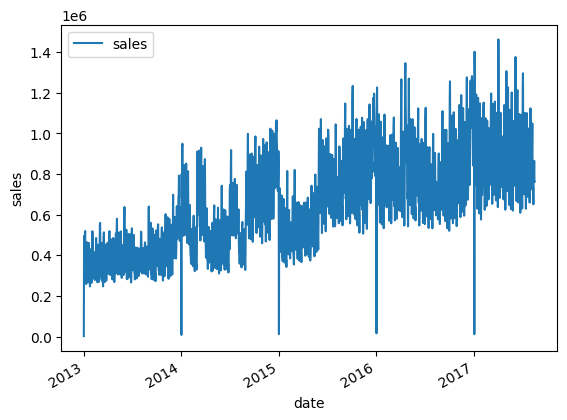

In [8]:
data_grouped = train_df[['date', 'sales']].groupby('date').sum()
data_grouped.index = pd.to_datetime(data_grouped.index, format="%Y-%m-%d")
data_grouped.plot(xlabel='date', ylabel='sales')

* This tells us a normal model can predict this regardless of the exact date

<h3> <span style="border-left: 10px solid grey; border-radius: 10px;padding: 5px; background: #f0f0f0; border-radius: 5px; color: black;"> Correlation Analysis</span></h3>

In [13]:
import seaborn as sns
def encoding(df, title):
    return pd.get_dummies(df[title])
encoded_train = train_df.join(encoding(train_df, 'family'))

In [47]:
def columnsCollector(df):
    return df.select_dtypes(include=['bool']).columns.to_list() + df[['sales']].columns.to_list() + df[['store_nbr']].columns.to_list()
all_columns = columnsCollector(encoded_train)


In [48]:
import numpy as np 
data = abs(encoded_train[all_columns].corr())
top_attributes = data['sales'].sort_values(ascending=False).index[:30].tolist()
updated_data = encoded_train[top_attributes]


<Axes: >

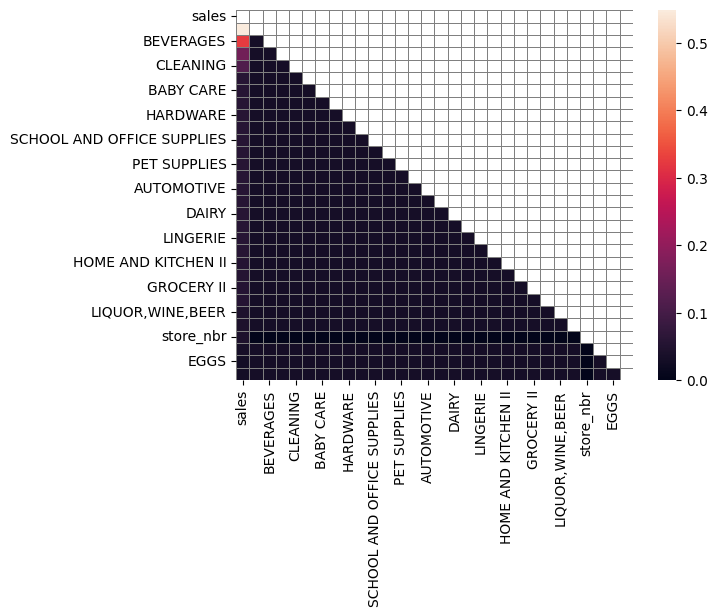

In [83]:
sns.heatmap(abs(updated_data.corr()), linewidths=.5, linecolor='grey',mask=np.triu(np.ones_like(updated_data.corr())))